In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = pd.read_excel("results_6bus_1000.xlsx", sheet_name="results")
df = pd.read_excel("results_118bus4_150.xlsx", sheet_name="results")

In [81]:
N=3
Lower_bound = {}
Upper_bound = {}
computation_time = {}
labels = ["" for i  in range(N)]
for i in range(N):
    name = df["Cut"][i]
    A = df["lb"][i]
    C = df["time"][i]
    D = df["ub"][i]

    # Conversion de chaînes comme "[1.0, 2.0, 3.0]" en liste de float
    def parse_list(s):
        if s is None:
            return []
        s = s.strip("[] ")
        if not s:
            return []
        return [float(x) for x in s.split(",")]
    
    LB = parse_list(A)
    T = parse_list(C)
    time_iter = round(T[-1]/len(T), ndigits = 1)
    UB = parse_list(D)

    label = name + f" (time/iter: {time_iter} s)"
    labels[i] = label
    Lower_bound[label] = LB
    computation_time[label] = T
    Upper_bound[label] = UB

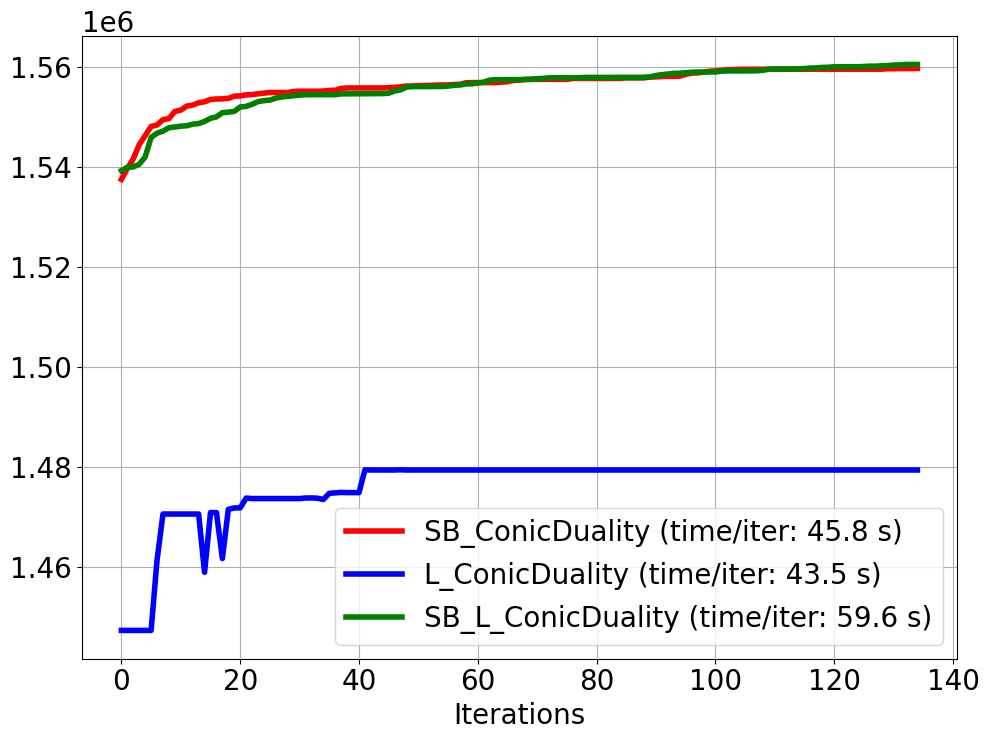

In [84]:
# colors = ['red', 'red', 'blue', 'blue', 'green', 'green']
# linestyles = [':', '-', ':', '-', ':', '-']
colors = ['red', 'blue', 'green']
linestyles = ['-', '-', '-']
K=15
M=500
plt.figure(figsize=(10, 7.5))

for i in range(N):
    name = labels[i]
    plt.plot(Lower_bound[name][K:M], 
             linewidth=4, 
             linestyle=linestyles[i],
             label=name,
             color=colors[i])

fontsize = 20 
plt.xlabel("Iterations", fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.gca().yaxis.offsetText.set_fontsize(fontsize)
plt.legend(fontsize=fontsize, loc='lower right')
plt.grid(True)
plt.tight_layout()
# plt.savefig(f"Lower_bound_6bus.pdf")
plt.savefig(f"Lower_bound_118bus.pdf")

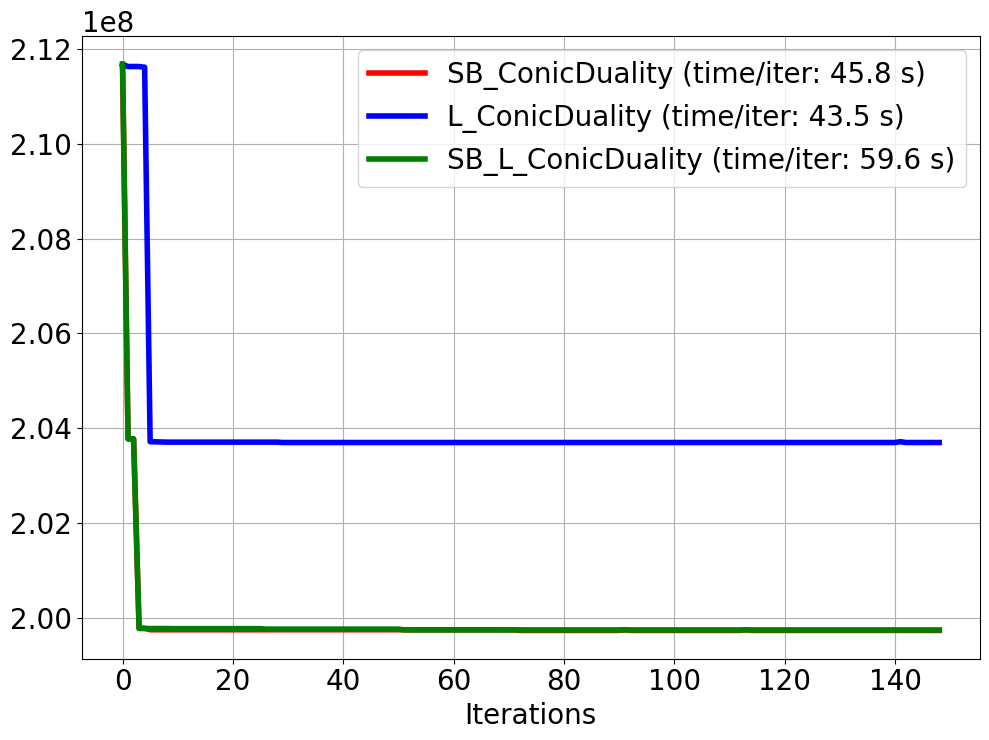

In [85]:
# colors = ['red', 'red', 'blue', 'blue', 'green', 'green']
# linestyles = [':', '-', ':', '-', ':', '-']
colors = ['red', 'blue', 'green']
linestyles = ['-', '-', '-']
K=1
M=500
plt.figure(figsize=(10, 7.5))

for i in range(N):
    name = labels[i]
    plt.plot(Upper_bound[name][K:M], 
             linewidth=4, 
             linestyle=linestyles[i],
             label=name,
             color=colors[i])

fontsize = 20
plt.xlabel("Iterations", fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
plt.gca().yaxis.offsetText.set_fontsize(fontsize)
plt.legend(fontsize=fontsize, loc='upper right')
plt.grid(True)
plt.tight_layout()
# plt.savefig(f"Upper_bound_6bus.pdf")
plt.savefig(f"Upper_bound_118bus.pdf")